In [5]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [38]:
train_df = pd.read_csv(r'/kaggle/input/textdb3/fake_or_real_news.csv')

In [39]:
train_df.head(15)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [40]:
train_df = train_df.drop("Unnamed: 0", axis = 1)
# train_df = train_df.drop("title", axis = 1)
# train_df = train_df.drop("subject", axis = 1)

In [9]:
train_df.shape

(6335, 3)

In [10]:
train_df.head(15)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


<AxesSubplot:xlabel='label', ylabel='count'>

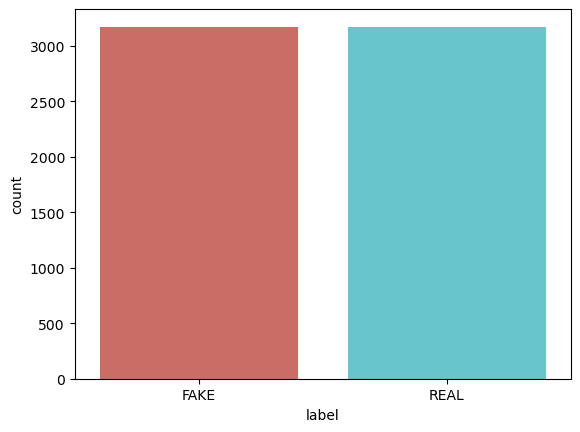

In [11]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_df)

In [12]:
def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB
check finished.


In [13]:
train_df = train_df.dropna()

In [14]:
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 198.0+ KB
check finished.


In [15]:
train_df.shape

(6335, 3)

In [16]:
train_df.head(10)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [17]:
train_df.reset_index(drop= True,inplace=True)

In [18]:
label_train = train_df.label

In [19]:
label_train.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

In [20]:
train_df = train_df.drop("label", axis = 1)

In [21]:
train_df['text'][2188]

'Republican presidential nominee Donald Trump and Democratic presidential nominee Hillary Clinton have made headlines recently for their alleged problems with the law . Trump, who in April of 2016 was named as the defendant in a lawsuit filed by Katie Johnson, is scheduled to appear before a court on December 16, 2016. The lawsuit alleges Trump, along with former banker billionaire and convicted pedophile Jeffrey Epstein, raped Johnson when she was thirteen. The incident allegedly happened in the 1990s. Epstein, who was convicted of soliciting an underage girl for prostitution in 2008, has also been associated with former President Bill Clinton, whose name appears in “ flight logs showing the former president taking at least 26 trips aboard the ‘Lolita Express, ’” a term used in association with Epstein’s Boeing 727 jet. The jet was allegedly set up with beds where Epstein and guests “ had group sex with young girls .” The lawsuit was first filed in April , but U.S. Magistrate Judge Ka

In [22]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [23]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
# for x in range(len(train_df)) :
  #   corpus = []
   #  review = train_df['text'][x]
 #    review = re.sub(r'[^a-zA-Z\s]', '', review)
#     review = review.lower()
#     review = nltk.word_tokenize(review)
#     for y in review :
  #       if y not in stpwrds :
  #           corpus.append(lemmatizer.lemmatize(y))
  #   review = ' '.join(corpus)
  #   train_df['text'][x] = review    

LookupError: 
**********************************************************************
  Resource 'corpora/wordnet' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - '/root/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

In [25]:
train_df['text'][2182]

"0 comments \nThis is just too rich! The FBI agreed to destroy the laptops that Clinton and her aides turned over during the EmailGate investigation… and then agents REFUSED to do it. Now, the laptops have been subpoenaed and the FBI is just waiting for Congress to ask for them. Oh goody! All that evidence is about to come back into play along with Weiner’s laptop that has over 10,000 emails of Huma’s dealings with Hillary Clinton. Good times. Stick a fork in them… I’d say they may just be about done. \nWashington D.C. attorney Joe DiGenova is the one that broke this explosive revelation. Hillary Clinton must be having multiple panic attacks right about now. I guess we are going to see just how well her health holds up over her corruption being exposed. I understand that she looks dead tired over all this. I’ll bet. Her lies are finally beginning to catch up with her. They should have long ago. \nFrom The Daily Caller: \nAgents within the Federal Bureau of Investigation never destroyed

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df['text'], label_train, test_size=0.3, random_state=1)

In [27]:

X_train

4297    posted by Eddie Whether you have back dimples,...
3757    House Republicans and President Obama joined f...
913     Donald Trump is looking for a veep with the po...
1262    Regarding the dissenting justices: Um, what th...
769     President Barack Obama on Tuesday addressed th...
                              ...                        
905     Donald Trump said in an interview that economi...
5192    Miami (CNN) There were few softballs Wednesday...
3980    Throughout the Republican Party, from New Hamp...
235      Why Hillary Won't Unleash WWIII By Pepe Escob...
5157    Editor’s Note : Disgusting. This country just ...
Name: text, Length: 4434, dtype: object

In [28]:
X_train.shape

(4434,)

In [29]:
Y_train

4297    FAKE
3757    REAL
913     REAL
1262    REAL
769     REAL
        ... 
905     REAL
5192    REAL
3980    REAL
235     FAKE
5157    FAKE
Name: label, Length: 4434, dtype: object

In [30]:
tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

In [ ]:
tfidf_X_train.shape

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_X_train,Y_train)

PassiveAggressiveClassifier()

Accuracy: 93.85%
Confusion matrix, without normalization


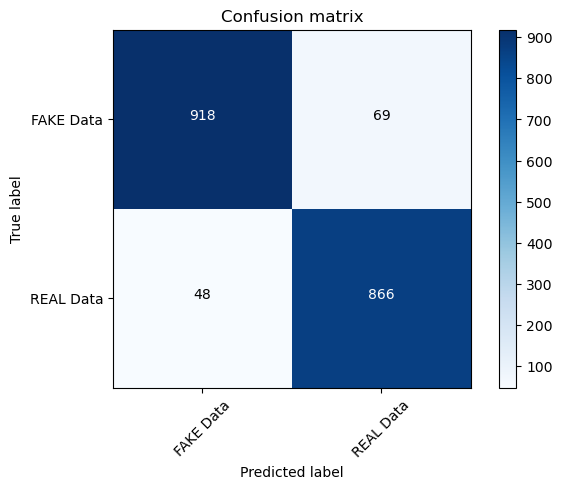

In [34]:
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [35]:
pickle.dump(classifier,open('./model.pkl', 'wb'))

In [36]:
# load the model from disk
loaded_model = pickle.load(open('./model.pkl', 'rb'))

In [1]:
def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))     
    input_data = [' '.join(corpus)]
    vectorized_input_data = tfidf_v.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    if prediction[0] == "FAKE":
        print("Prediction of the News :  Looking Fake⚠ News📰 ")
    else:
        print("Prediction of the News : Looking Real News📰 ")